In [1]:
from pathlib import Path
from data.df_io import read, get_feat_lables
from data.df_prep import get_specific_split, pre_processing
from ai_models.PLA import PLA
from ai_models.regression import LinearRegression, LogisticRegression
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line


train_path = Path("../digits/db/dataset_digits/train.csv")
test_path = Path("../digits/db/dataset_digits/test.csv")

In [2]:
df_train = read(train_path)
df_test = read(test_path)

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

In [4]:
X_train_redu = pre_processing(X_train)
X_test_redu = pre_processing(X_test)

## Get specific 1x5 dataset

In [5]:
X_train_1x5, Y_train_1x5 = get_specific_split(X_train_redu, Y_train, 5, 1)
X_test_1x5, Y_test_1x5 = get_specific_split(X_test_redu, Y_test, 5, 1)

In [6]:
zeros_Y_train_1x5 = Y_train_1x5.copy()
zeros_Y_train_1x5[zeros_Y_train_1x5 == -1] = 0

zeros_Y_test_1x5 = Y_test_1x5.copy()
zeros_Y_test_1x5[zeros_Y_test_1x5 == -1] = 0

## Train and test PLA

In [7]:
pla_model = PLA()
it, w, W = pla_model.fit(X_train_1x5, Y_train_1x5, epochs=1000)

In [8]:
Y_pred = pla_model.predict(X_train_1x5, w)
compute_acc(Y_train_1x5, Y_pred)

0.6815878378378378

In [9]:
it

1000

In [10]:
Y_pred = pla_model.predict(X_test_1x5, w)
compute_acc(Y_test_1x5, Y_pred)

0.6843910806174958

In [11]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 0.6843910806174958,
 'precision': np.float64(0.6134453781512605),
 'recall': np.float64(1.0),
 'f1': np.float64(0.7604166666666666)}

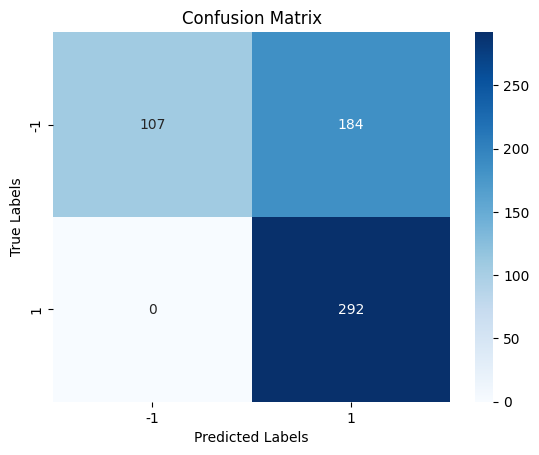

In [12]:
confusion(Y_test_1x5, Y_pred)

In [13]:
# show_model_line(
#     pd.DataFrame(X_train_1x5, columns=["intensity", "symmetry"]),
#     pd.DataFrame(Y_train_1x5, columns=["label"]), 
#     d1=1, 
#     d2=5,
#     w=w,
# )

## Train and test linear regression

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train_1x5, Y_train_1x5)
w = linear_model.getW()

In [15]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(Y_train_1x5, Y_pred)

0.4864864864864865

In [16]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(Y_test_1x5, Y_pred)

0.49914236706689535

In [17]:
eficiency_report(Y_test_1x5, Y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'acc': 0.49914236706689535,
 'precision': np.float64(0.0),
 'recall': np.float64(0.0),
 'f1': np.float64(0.0)}

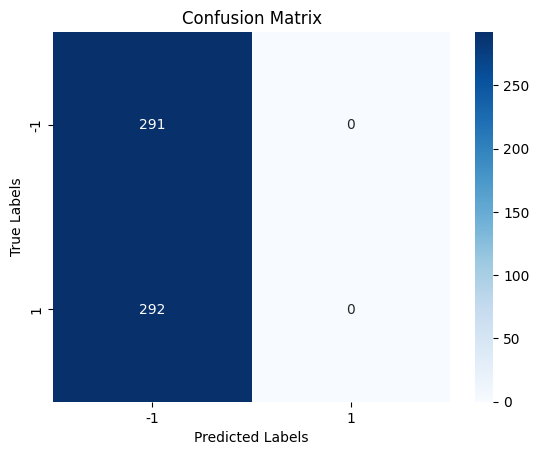

In [18]:
confusion(Y_test_1x5, Y_pred)

## Train and test logistic regression

In [19]:
linear_model = LogisticRegression(lr=0.01, n_iters=1000, bs=128)
linear_model.fit(X_train_1x5, zeros_Y_train_1x5)
w = linear_model.getW()

In [20]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(zeros_Y_train_1x5, Y_pred)

0.6081081081081081

In [21]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(zeros_Y_test_1x5, Y_pred)

0.5883361921097771

In [22]:
eficiency_report(zeros_Y_test_1x5, Y_pred)

{'acc': 0.5883361921097771,
 'precision': np.float64(0.5488721804511278),
 'recall': np.float64(1.0),
 'f1': np.float64(0.7087378640776699)}

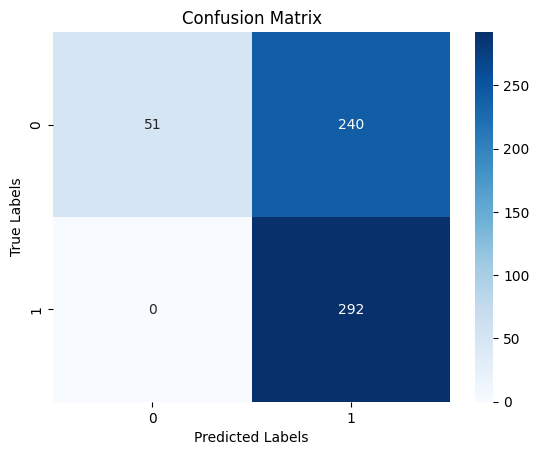

In [23]:
confusion(zeros_Y_test_1x5, Y_pred, 0, 1)